# Data Analysis Project using Pandas & Numpy & matplotlib.

This is my project in pursuit of my first nanodegree in Data Analysis.
Dataset Description

This is a data about a movie database that have been downloadad through Kaggle. It contains thousands of movies from different genres. It contains multiple features and user ratings.

Dataset Features:

- id: Movie ID.

- imdb_id: ID movie in IMBD website.

- popularity: Number describe Movie popularity.

- budget: Movie Budget.

- revenue: Movie Revenue.

- original_title: Movie Name.

- cast: Cast Names.

- homepage: Movie Official website.

- director: Director Name.

- tagline: Movie Tagline.

- keywords: Movie Keywords.

- overview: Movie overview.

- runtime: Movie Runtime.

- genres: Movie genres (Movie Types: action & Drama etc.)

- production_companies: Production Company Name.

- release_date: Movie Release Data.

- vote_count: Fans voting number of count.

- vote_average: Average of fans vote.

- release_year: Year of movie release.

Q-Research Question:

First question is about finding the pattern & Relationhip between profits & different variables:

Is there a relationship between profit and Popularity?

Is there a relationship between profit and budget?

Is there a relationship between profit and runtime?

Is there a relationship between profit and vote count or average?

Is there a relationship between profit and release year?

Q2-Research Question:

What's the most profitable movie of all time & which are the least (or loser)?

What's the most profitable genres of all time ?

Project Steps:

1- Introduction.

3- Data Wrangling

4- Exploratory Data Analysis.

5- Conclusions


# Introduction:

1- We will beging by importing the libraries(pandas, numpy, matplotlib.pyplot and seaborn). 

2- We are going to add the column that we want and remove the column that we don't want. 

3- We will clean the data by removing the duplicated and deal with the empty values.

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load datasets
df = pd.read_csv('tmdb-movies.csv')

In [328]:
#I am adding profit column by subtracting the revenues from budget.
#I am also adding profit adj column by subtracting the revenues adj from budget adj.

df["profits"] = df["revenue"] - df["budget"]
df["profits_adj"] = df["revenue_adj"] - df["budget_adj"]

In [329]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,profits_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


In [330]:
df.shape

(10866, 23)

In [331]:
# shift column 'Name' to first position
first_column = df.pop('original_title')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'original_title', first_column)

# Data wrangling

1- We are going to drop columns label that we don't want (If they don't help answering our quetion).

2- Modify wrong format data.

3-  We will clean the data by removing the duplicated and deal with the empty values.


In [332]:
#We are going to drop the column that we don't need and the columns that doesn't help answer our question.
df.drop(["id", "keywords", "imdb_id", 'homepage', 'overview', "tagline"], axis = 1, inplace = True)
df.head()

,original_title,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,profits_adj
0,Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,Mad Max: Fury Road,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,Insurgent,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,Star Wars: The Force Awakens,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,Furious 7,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


In [333]:
#Let's have some walk in our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10866 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
 15  profits            

## Comment:

All the columns are in correct format, except release_date format. We need to change it to datetime.

In [334]:
#We are going to change the datetime from object to datetime.
df['release_date'] = pd.to_datetime(df['release_date'])

In [335]:
#I will do some descriptive statistics about our data using describe.
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,profits_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,2.519762e+07,3.381332e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,9.658799e+07,1.252151e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,9.083358e+06,1.292617e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09


In [336]:
df.isnull().sum()

original_title             0
popularity                 0
budget                     0
revenue                    0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profits                    0
profits_adj                0
dtype: int64

# Findings & Comment:

We have many null values in specific column, the null value exist in column contains string value. And we also have many zero values.

Our dataframe contain two types of data (Categorical and Numerical). The challenge we have here is that we want to clean the data. And at the same time we don't want to delete too much data so it doesn't impact our result. In order to solve this this problem we will do the following steps:

First, regading categorial data, we will remove the row that contain null value so it doesn't impact our analysis. we cannot replace it with the mean because it's not numerical data.

Second, regarding Numerical data, instead of removing the data that contain Zero, we will replace it with mean of the entire column, this may not produce a 100% accurate data, but that's the closest we could ever get to the reality.

In [337]:
#Drop missing values in categorical columns.
df.dropna(subset=['cast'], inplace = True)
df.dropna(subset=['director'], inplace = True)
df.dropna(subset=['production_companies'], inplace = True)
df.dropna(subset=['genres'], inplace = True)

In [338]:
#I am going to create a list of the columns that have zero values. 
zero_value_columns = ['popularity', "budget", 'revenue', 'vote_count', 'vote_average', 'release_year', 'budget_adj','revenue_adj', 'profits', 'profits_adj', 'runtime']

#Replace all the values from 0 to NAN in the list (In order to replace them with the mean later on)
df[zero_value_columns] = df[zero_value_columns].replace(0,np.NAN)

In [339]:
#Replace all missing values ("NAN") to the mean of the entire columns.
df['popularity'].fillna((df['popularity'].mean()), inplace=True)

df['budget'].fillna((df['budget'].mean()), inplace=True)

df['revenue'].fillna((df['revenue'].mean()), inplace=True)

df['vote_count'].fillna((df['vote_count'].mean()), inplace=True)

df['vote_average'].fillna((df['vote_average'].mean()), inplace=True)

df['release_year'].fillna((df['release_year'].mean()), inplace=True)

df['budget_adj'].fillna((df['budget_adj'].mean()), inplace=True)

df['revenue_adj'].fillna((df['revenue_adj'].mean()), inplace=True)

df['profits'].fillna((df['profits'].mean()), inplace=True)

df['profits_adj'].fillna((df['profits_adj'].mean()), inplace=True)

df['runtime'].fillna((df['runtime'].mean()), inplace=True)

In [340]:
#Check to see if we have any duplicates:
df.duplicated().sum() 

1

In [341]:
#We are going to drop it.
df.drop_duplicates(inplace = True) 

In [342]:
#Now, let's rediagnose our data and see if our problems have been solved or not!
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,profits_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9.772000e+03,9.772000e+03
mean,0.694721,3.148914e+07,9.098550e+07,103.063735,239.312014,5.963528,2000.878428,3.778715e+07,1.173606e+08,4.596519e+07,6.167272e+07
std,1.036931,2.810341e+07,1.138393e+08,27.623135,603.011504,0.913174,13.036794,3.025462e+07,1.396255e+08,9.893583e+07,1.279878e+08
min,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08,-4.139124e+08
25%,0.232710,1.700000e+07,3.526309e+07,91.000000,18.000000,5.400000,1994.000000,2.267041e+07,4.908911e+07,2.378548e+05,2.638478e+05
50%,0.419762,3.148899e+07,9.097629e+07,100.000000,46.000000,6.000000,2005.000000,3.778635e+07,1.173487e+08,4.595752e+07,6.166344e+07
75%,0.776408,3.148899e+07,9.097629e+07,112.000000,173.000000,6.600000,2011.000000,3.778635e+07,1.173487e+08,4.595752e+07,6.166344e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09


# Comment & Findings:

Our steps to solve the problem of missing values and Zero value were succesful and solved our problem. It's barely to see cell contain Zero. And at the same time, we didn't drop a significant amount of data.

In [343]:
#Make sure we have no duplicates.
df.isnull().sum()

original_title          0
popularity              0
budget                  0
revenue                 0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profits                 0
profits_adj             0
dtype: int64

In [344]:
df.shape

(9772, 17)

Note: Our dataframe has declined from 10866 to 9772.

# Exploratory Data Analysis.

We are going to answer the quetions written above. We are going to do the following:

1- I will do a histogram in order to have a visualize view of my observation.

2- I we will do some advanced analysis using different type of charts in order to answer my questions above and see the relation between variables.And above all, in order to answer my above question.


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>,
        <AxesSubplot:title={'center':'profits'}>,
        <AxesSubplot:title={'center':'profits_adj'}>]], dtype=object)

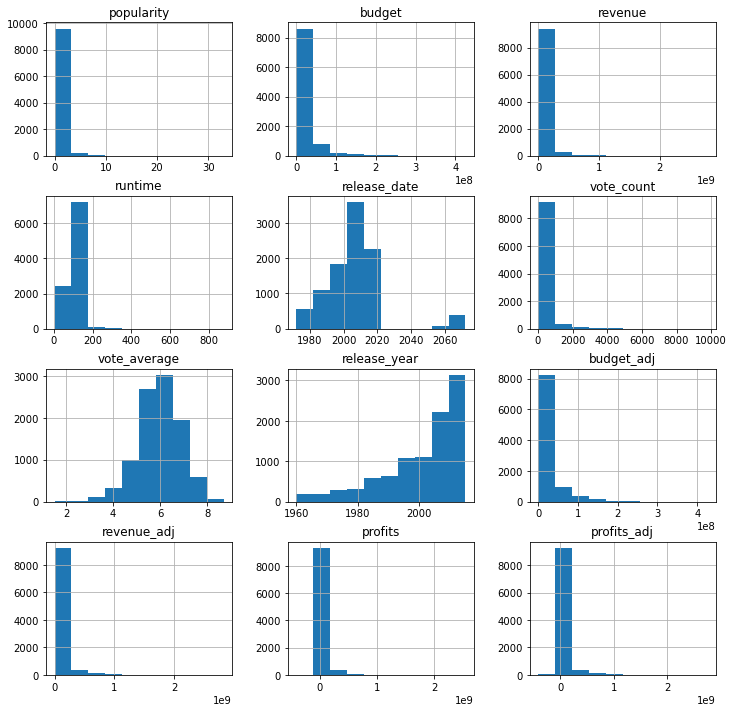

In [345]:
#Draw a histogram to diagnose our dataframe.
df.hist(figsize=(12,12))

# Findings:

The following are skewed to the right:

- Budget.

- Revenue.

- Popularity

- Runtime.

- Vote_count.

- Profits adj.

- Profits

- Budjet_adj.

- Profits. Interpetation:

These data imply that our frequency distribution lies in the left of the mean. This also imply that our mean is bigger than the median and mode (mean>median>mode). It implies that there are very few observations with high values whether revenue or runtime etc.

The following are skewed to the left:

- Release Year.

This imply that the years above 2000 are the most Years in our dataframe. Also September and January have similar frequency.

The only normally distributed graph is revenue_adj. This imply that the average mean = median = mode. And it appears that 6 is the most common observation in revenue_adj column.

In [346]:
#Create a function to avoid repetitive code. We are going to draw a lot of charts, so we need to make a function instead of writing the whole code again everytime.
#We will draw scatterplot and regression in order to know the relationship between variables and predict the future.
def regressionplot(df,xvar,yvar, line_color= "green"):
    
    plt.figure(figsize=(14,8))   
    
    sns.regplot(data=df, x=xvar, y=yvar, line_kws={"color":line_color})
    
    plt.title(f"Relationship between {xvar} and {yvar}".title(), fontsize= 22)
    
    plt.xlabel(xvar.title(), fontsize = 20)
    
    plt.ylabel(yvar.title(), fontsize = 20)

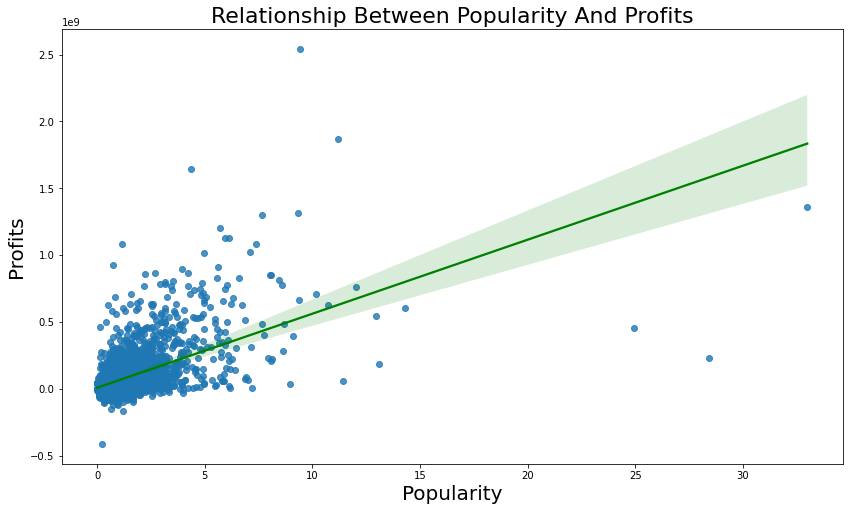

In [347]:
regressionplot(df, "popularity", "profits")

## Findings & Comment:

It shows that there's a positive relationship between Popularity an profits. As popularity increases, profits increases. Please note that this do not imply causation. Sometimes popular branded movies achieve less profts for some reasons.

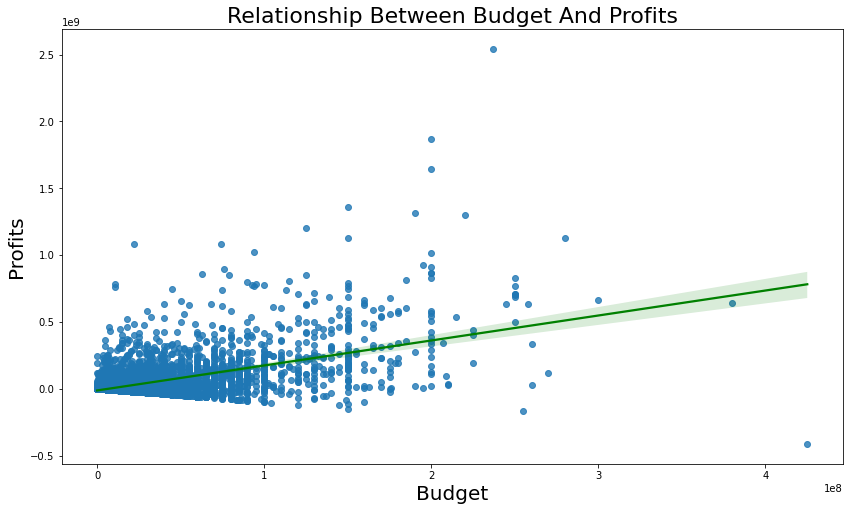

In [348]:
regressionplot(df,"budget", "profits")

# Findings & Comments:

The line plot goes up, which means there's a positive relationship between budget and profits. We are more likely to increase our profit through increasing our budget. Buget more equal to profits more. But becareful. correlation do not always imply causation. 

There maybe other causes of the profits. We usally see movies achieve a little profits although it has a huge budget.

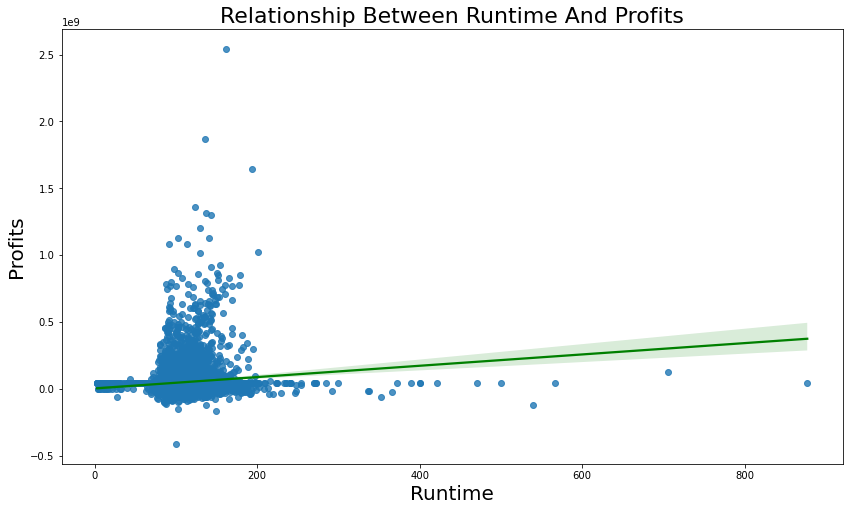

In [349]:
regressionplot(df,"runtime", "profits")

## Findings & Comments:

The line plot goes up, which means there's a positive relationship between Runtime and profits. Profits are more likely to increase if we increase the runtime. Please not that this doesn't imply causation as well.


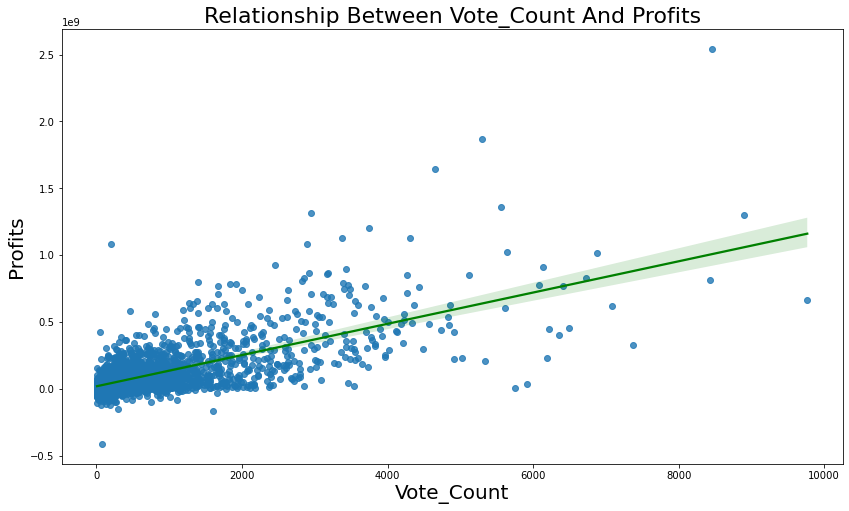

In [350]:
regressionplot(df,"vote_count", "profits")

### Findings & Comments:

The line plot goes up, which means there's a positive relationship between Vote Count and profits. People are more attracted to the movies that have a big count. 

Pleae note that this means there's a correlation, but not the main cause.

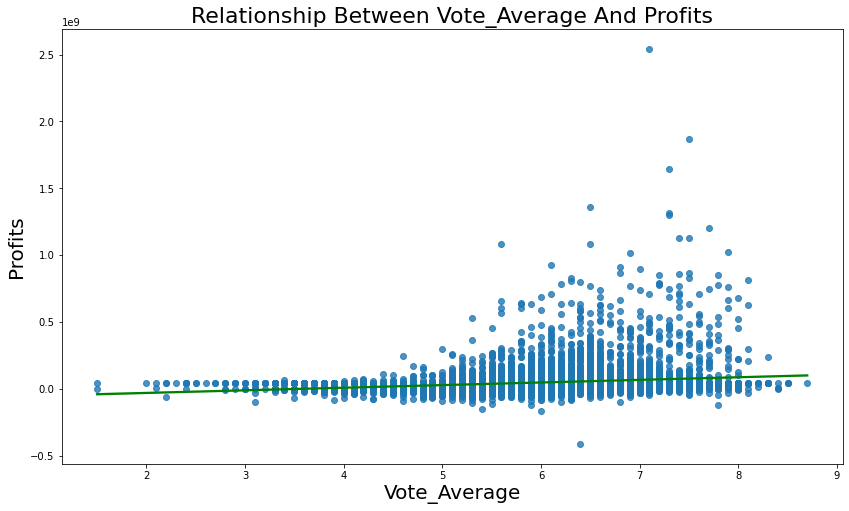

In [351]:
regressionplot(df,"vote_average", "profits")

## Findings & Comments:

It seems that the line plot goes up, which means there's a positive relationship between Vote average and profits. 

Pleae note that this means there's a correlation, but not the main cause.

The graph is a bit unclear, we need to draw other kind of plots in order to draw a concluion about the relationship between vote average and profits.

Text(0, 0.5, 'vote_average')

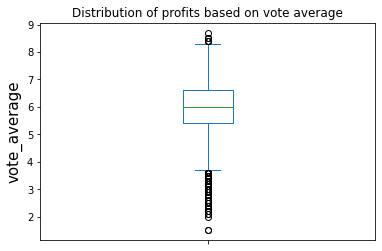

In [352]:
df.plot(x="profits", y= "vote_average", kind="box", title= "Distribution of profits based on vote average")
plt.xticks([1], [''])
plt.ylabel('vote_average', fontsize=15)

## Comments:

The profits is normally distributed around the mean 6. Also, the graph shows that the profits are more likely to happen if the count average is between 5 & 7.


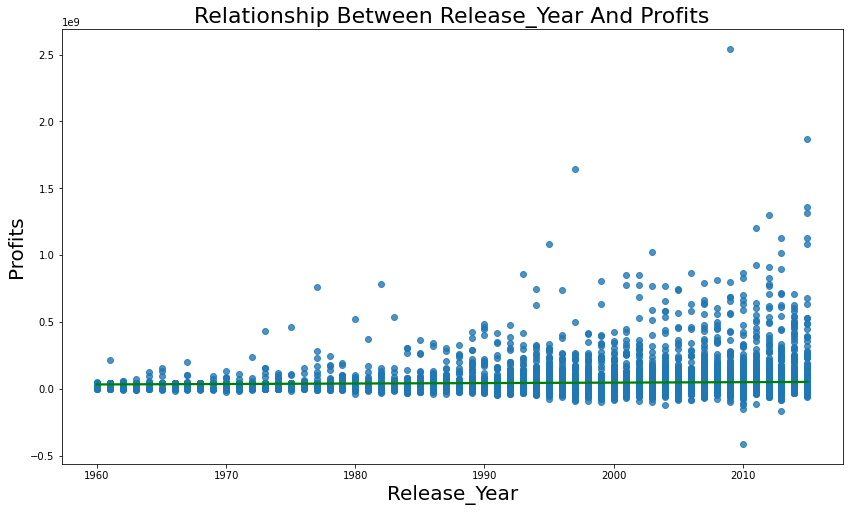

In [353]:
regressionplot(df,"release_year", "profits")

Text(0, 0.5, 'release_year')

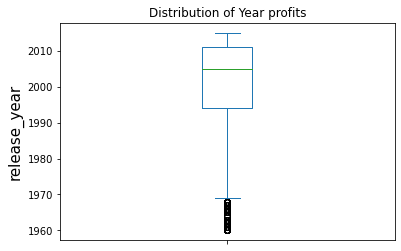

In [354]:
#Distirbution of year profits.
df.plot(x="profits", y= "release_year", kind="box", title= "Distribution of Year profits")
plt.xticks([1], [''])
plt.ylabel('release_year', fontsize=15)

In [355]:
#Change the release year to string type.
df["new_release_year"] = df["release_year"].astype(str)

#Extract top profitable movies of all time based on profit_adj with dollar value today.
Most_profit_movie = df.groupby(['original_title', "new_release_year"])[['profits_adj']].agg('mean').nlargest(5,'profits_adj')
Most_profit_movie

,,profits_adj
original_title,new_release_year,
Star Wars,1977,2.750137e+09
Avatar,2009,2.586237e+09
Titanic,1997,2.234714e+09
The Exorcist,1973,2.128036e+09
Jaws,1975,1.878643e+09


Text(0, 0.5, 'profits')

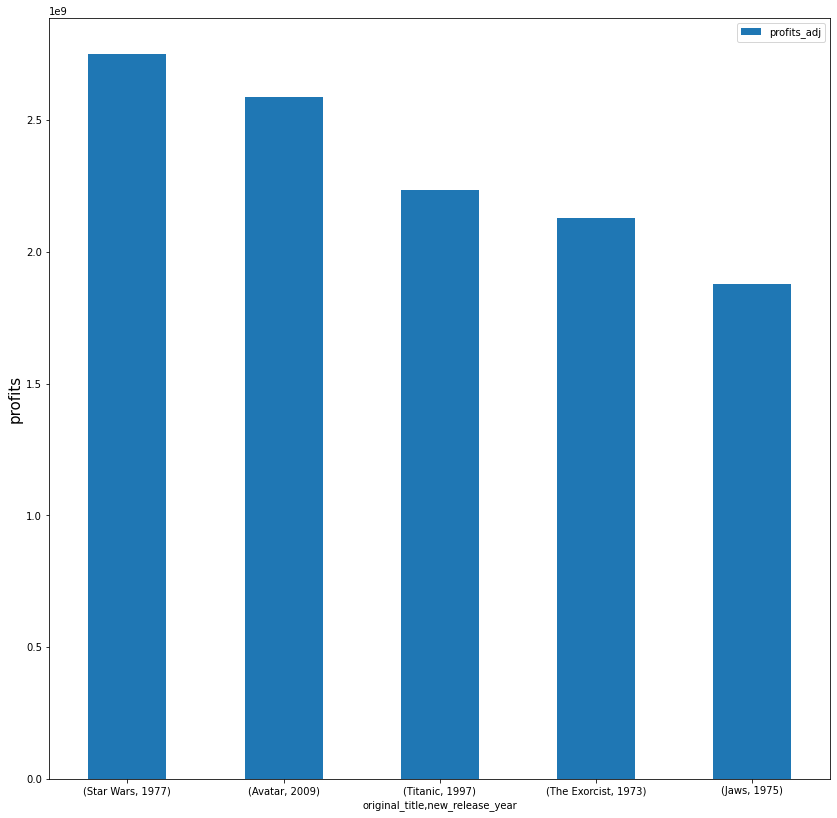

In [356]:
#Now we will extract top profitable movies of all time and in which years.
Most_profit_movie = df.groupby(['original_title', "new_release_year"])[['profits_adj']].agg('mean').nlargest(5,'profits_adj')
Most_profit_movie.plot(kind="bar", figsize=(14,14), rot=0, fontsize=10)
Most_profit_movie.index.map('\n'.join)
plt.ylabel("profits", fontsize=15)
#I didn't put x_label because it's already there.

### Findings:
It's vlea star wars is the winner. The five movies are very popular and most loved by the people.

Text(0, 0.5, 'profit loss')

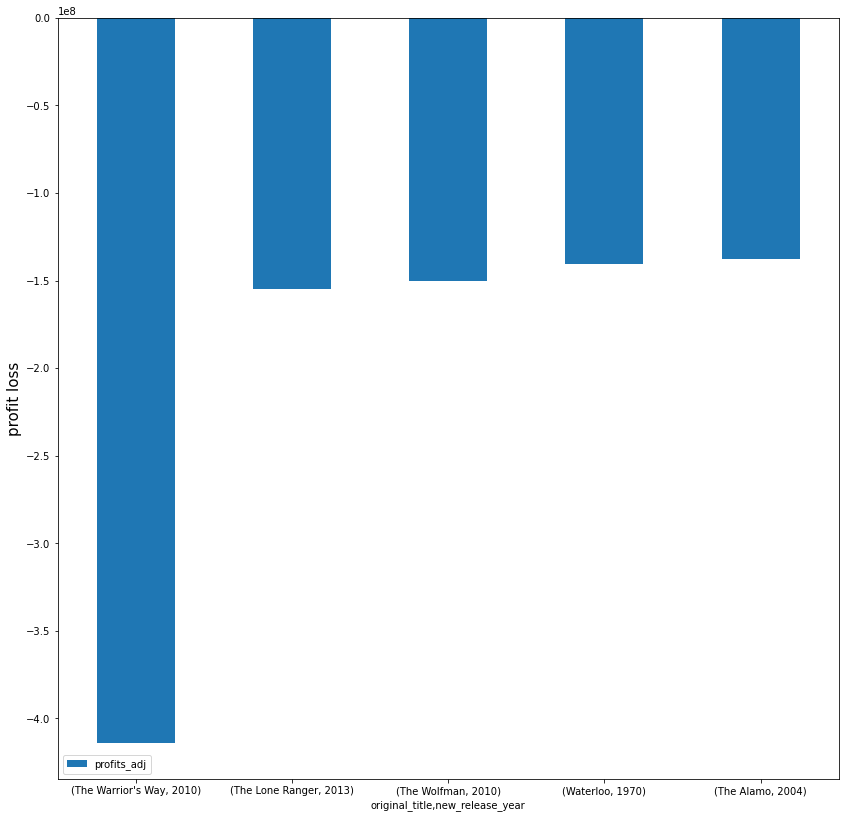

In [357]:
#Least profitable movie of all time.
Most_profit_movie = df.groupby(['original_title', "new_release_year"])[['profits_adj']].agg('mean').nsmallest(5,'profits_adj')
Most_profit_movie.plot(kind="bar", figsize=(14,14), rot=0, fontsize=10)
Most_profit_movie.index.map('\n'.join)
plt.ylabel("profit loss", fontsize=15)
#I didn't put x_label because it's already there.

### Findings:
It's clear the warriors way is the least profitable movie in all time. Personally, I never heard about these movies. The graph seems very accurate.

Text(0.5, 0, 'profits')

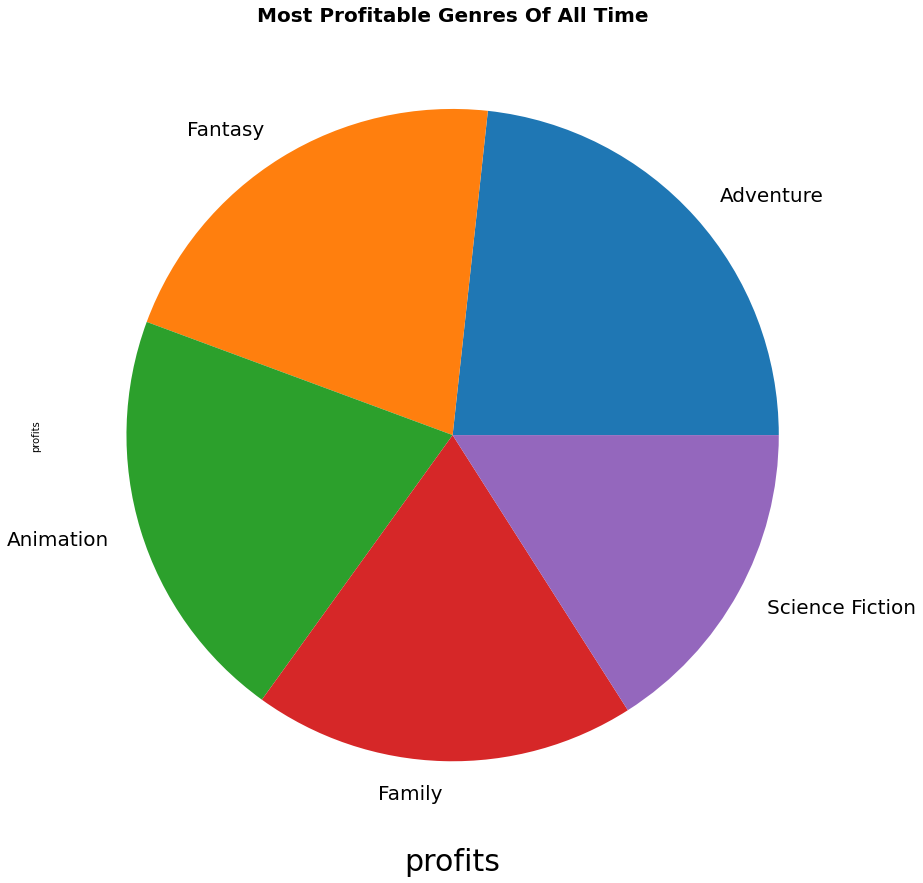

In [358]:
#split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
#Group top five genres of all time based on profits average.
top_genres = genres_df.groupby('genres')['profits'].mean().nlargest(5)
top_genres.plot(kind="pie",figsize=(15,15),fontsize= 20)
plt.title('Most profitable genres of all time'.title(),
               fontsize = 20, weight = "bold")
plt.xlabel('profits', fontsize= 30)

### Findings:
It seems that adventure & Animation is the winner. Family is not a priority unfortunately.

Romance is not even in the list. A Very rough world :D

# Summary:

We cleaned our data from duplicates & null vales. Our data have declined from more than 10k to less than 9k. We did an analysis about the relationship between different features & variables and profits. We make plots and draw a regression in order to prove our points. The relation & correlation question require using scatter plot in order to make relationship between numerical values. It was not possible to draw scatter plot between all features and profits because some features were Categorical.

# Limitation:

The graphs may not be 100% accurate due to the cleaning process that we have done. We removed a significant amount of data. I also deleted some features where I believe was not necessary to answer our questions above. Some may find it necessary but this was my point of view.

I didn't do any statistical inference test to give a more accurate conculsion. This data sample may have uncertainity. Different data sample may give another result.

I was not intended to give specific answer, but I intended to draw a relationship which may contribute to find the real reasons.


# Conclusion:

We are concluding that there's a significant relationhip & correlation between Popularity & budget, runtime, release year, vote count and profits. It looks like as year pass, the movie industry became more creative and make more money than before. Also the vote count play a massive rule for increasing the profits of the movies. Including one or more of these variables will reult in more profits by default. Although it's not always the same.

Please kindly note that, all what we have done is about drawing a relationship in order to find a correlation between different variables. It doesn't imply causation by any means. There maybe an external factors that may cause the profits to be higher such as marketing or media which is not included in our dataframe.
